In [ ]:
import pandas as pd
import numpy as np
import os
import codecs
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [ ]:
def isstationary(emo):
    directory_path = "C:/Users/PIYUSH/Desktop/time series"
    median_emotions = []

    file_list = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

    for index, file_name in enumerate(file_list):
        if index % 2 == 1:
            file_path = os.path.join(directory_path, file_name)

            try:
                with codecs.open(file_path, 'r', encoding='utf-8', errors='ignore') as file:

#                     print(f"Opened file: {file_name}")

                    df = pd.read_csv(file)

                    # Check if 'joy' column exists in the DataFrame
                    if emo in df.columns:
                        median_emotion = df[emo].median()
                        median_emotions.append(median_emotion)
#                         print(f"Median of 'joy' column in {file_name}: {median_emotion}")

            except Exception as e:
                print(f"Error opening file {file_name}: {str(e)}")

    return median_emotions


In [ ]:
median_list = isstationary('surprise')


print("List of medians:", median_list)


List of medians: [0.2321975, 0.23454477, 0.23659344, 0.23430246, 0.231076315, 0.228190365, 0.231781285, 0.243222305, 0.22662897, 0.217438135, 0.23651631, 0.23934394, 0.24024357, 0.234512135, 0.23738834, 0.24590153, 0.23737338, 0.239203845, 0.236544375, 0.24198228, 0.24452813, 0.24009164, 0.23871503, 0.23604089, 0.23954185, 0.23950281, 0.2401515, 0.24102697, 0.23999463999999998, 0.24105905, 0.24173261499999998, 0.23794314, 0.23060294, 0.23123208, 0.23299619, 0.21911201, 0.23324427, 0.23350596, 0.23736048, 0.23477299, 0.2363293, 0.23582913, 0.234324515, 0.23185154, 0.23320179, 0.23348671, 0.23795766499999998, 0.23642589, 0.23518509, 0.233560925, 0.23768212, 0.23428212, 0.23558098, 0.23121399, 0.227524585, 0.22961677, 0.23196967, 0.23541373999999998, 0.232293865, 0.24624174, 0.22459859, 0.227685905, 0.236092695, 0.232643765, 0.23065238999999998, 0.23121582, 0.23075127, 0.23200093, 0.22877692500000002, 0.22989719, 0.223202, 0.22884094, 0.22941924, 0.23201531, 0.23173672, 0.227033425, 0.232

In [ ]:
print(len(median_list))

result = adfuller(median_list)

92


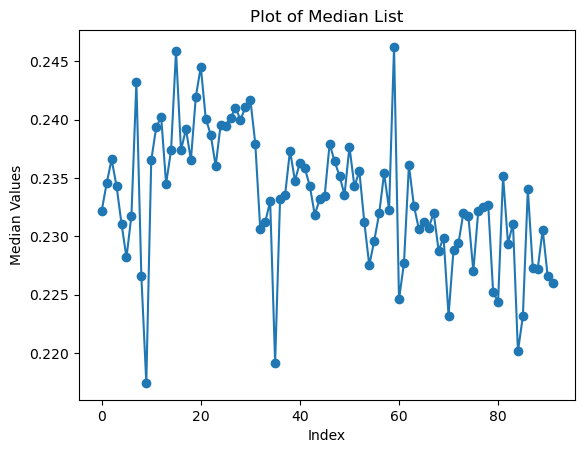

In [ ]:
\import matplotlib.pyplot as plt

# Assuming you have a 'median_list' containing your data


# Create a list of indices corresponding to the length of 'median_list'
x_values = range(len(median_list))

# Plot 'median_list' against the indices
plt.plot(x_values, median_list, marker='o', linestyle='-')

# Add labels and a title
plt.xlabel('Index')
plt.ylabel('Median Values')
plt.title('Plot of Median List')

# Show the plot
plt.show()


In [ ]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.994289
p-value: 0.000023
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Reject Ho - Time Series is Stationary


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

result = adfuller(median_list)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")


if result[0] >= result[4]["5%"]:

    differenced_median_list = pd.Series(median_list).diff().dropna()


    differenced_result = adfuller(differenced_median_list)


    print('\nADF Statistic (after differencing): %f' % differenced_result[0])
    print('p-value (after differencing): %f' % differenced_result[1])
    print('Critical Values (after differencing):')
    for key, value in differenced_result[4].items():
        print('\t%s: %.3f' % (key, value))

    # Check if the differenced data is stationary
    if differenced_result[0] < differenced_result[4]["5%"]:
        print("Reject Ho - Differenced Time Series is Stationary")
    else:
        print("Failed to Reject Ho - Differenced Time Series is Non-Stationary")


ADF Statistic: -4.994289
p-value: 0.000023
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Reject Ho - Time Series is Stationary
